In [1]:
import ctypes
import math
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
class DynamicArray:
    def __init__(self, start_capacity = 8, growth_t = "double"):
        self.capacity = start_capacity
        self.lenght = 0 
        self.data = (self.capacity * ctypes.py_object)()
        self.growth_type = growth_t
        self.resize_count = 0

    def append(self, value):
        if self.lenght == self.capacity:
            self.resize()
        self.data[self.lenght] = value
        self.lenght += 1

    def resize(self):
        if self.growth_type == "double":
            growth = 2
        elif self.growth_type == "fixed":
            growth = 1 + 4 / 10
        elif self.growth_type == "dynamic":
            growth = 1 + (4 / 10) / math.log2(self.lenght + 2)
        else:
            raise ValueError("unknown growth type")
        
        new_capacity = int(self.capacity * growth)
        if new_capacity <= self.capacity:
            new_capacity = self.capacity + 1

        new_data = (new_capacity * ctypes.py_object)()
        for i in range(self.lenght):
            new_data[i] = self.data[i]

        self.data = new_data
        self.capacity = new_capacity
        self.resize_count += 1

    def __len__(self):
        return self.lenght

In [5]:
def run_experiment(limit=10000):
    strategies = ["double", "fixed", "dynamic"]
    all_data = []
    
    plt.figure(figsize=(12, 7))
    
    for strategy in strategies:
        arr = DynamicArray(start_capacity=8, growth_t=strategy)
        capacities = []
        
        for i in range(limit):
            arr.append(i)
            capacities.append(arr.capacity)

        plt.plot(range(limit), capacities, label=f'Стратегія: {strategy}', linewidth=2)

        all_data.append({
            "Стратегія": strategy,
            "Кількість Resize": arr.resize_count,
            "Фінальна ємність": arr.capacity,
            "Ефективність пам'яті (%)": round((limit / arr.capacity) * 100, 2)
        })

    plt.title("Порівняння стратегій зростання DynamicArray", fontsize=14)
    plt.xlabel("Кількість доданих елементів (n)", fontsize=12)
    plt.ylabel("Поточна ємність масиву (Capacity)", fontsize=12)
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()
    
    return pd.DataFrame(all_data)

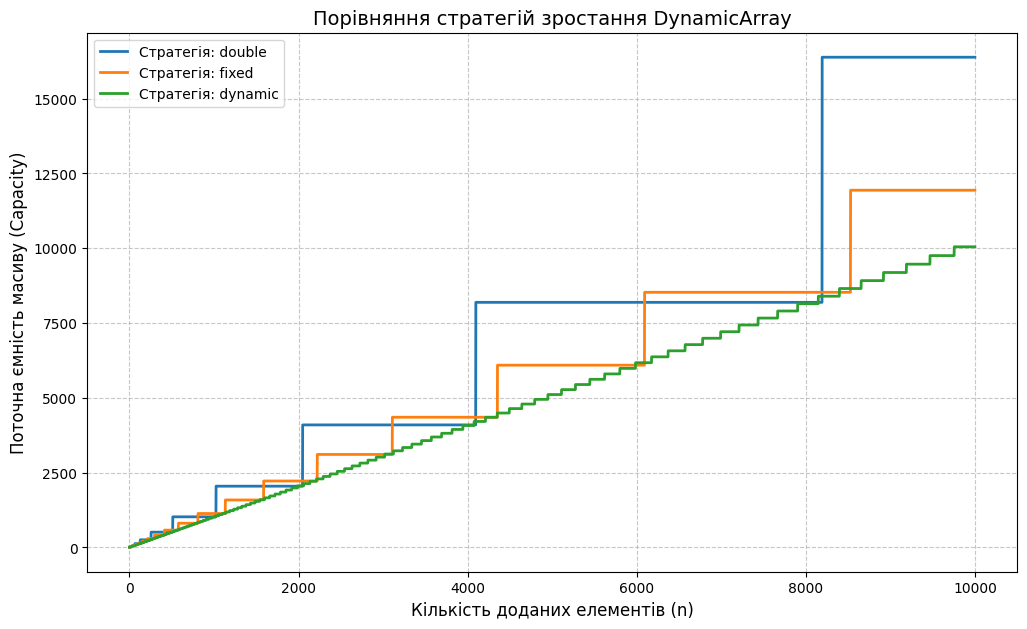

,Стратегія,Кількість Resize,Фінальна ємність,Ефективність пам'яті (%)
0,double,11,16384,61.04
1,fixed,22,11939,83.76
2,dynamic,159,10048,99.52


In [6]:
results_table = run_experiment(10000)
results_table